In [263]:
# Title: Student Exam Score Prediction - Data Import and Visualization Setup

# Importing required libraries
import pandas as pd          # For data handling and analysis
import matplotlib.pyplot as plt   # For plotting graphs


In [264]:
# Load Dataset
# Reading the Student Performance Factors dataset into a pandas DataFrame
df=pd.read_csv("StudentPerformanceFactors.csv")

In [265]:
# Display the first 5 rows of the dataset
# This helps to quickly understand the structure and sample data
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [266]:
# Check for missing values in each column
# This step helps identify columns that may need cleaning or imputation
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [267]:
# Feature Selection
# Selecting 'Hours_Studied' as the input feature (X)
X=df[["Hours_Studied"]]
# Target Variable
# Selecting 'Exam_Score' as the target variable (y)
y=df["Exam_Score"]

In [268]:
# Import required libraries from scikit-learn
# train_test_split: To split dataset into training and testing sets
# LinearRegression: To create and train the linear regression model
# PolynomialFeatures: To transform features for polynomial regression
# r2_score, mean_squared_error, mean_absolute_error: Metrics to evaluate model performance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [269]:
# Split the dataset into training and testing sets
# test_size=0.2 means 20% of the data will be used for testing, 80% for training
# random_state=42 ensures reproducibility of the split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [270]:
# Initialize the Linear Regression model
Model=LinearRegression()
# Train the model using the training data
Model.fit(X_train,y_train)


LinearRegression()

In [271]:
# Predict exam scores on the test set using the trained linear regression model
y_pre=Model.predict(X_test)
y_pre

array([67.22454236, 67.79587985, 67.5102111 , ..., 68.08154859,
       67.5102111 , 68.08154859], shape=(1322,))

Text(0, 0.5, 'Exam_Score')

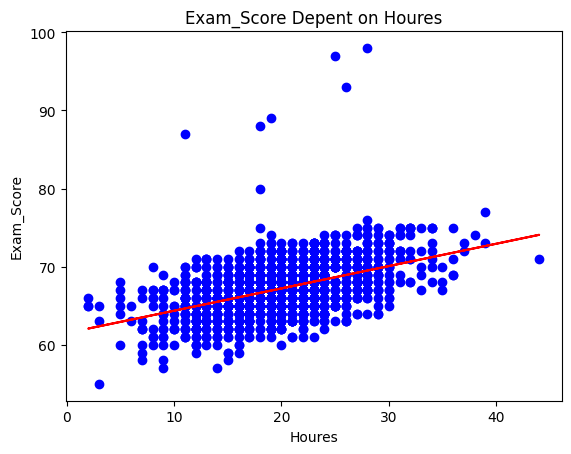

In [272]:
# Visualize the actual vs predicted exam scores
# Scatter plot shows actual data points (blue)
plt.scatter(X_test,y_test,color="blue",label="Actual Data")
# Line plot shows predicted values (red) from the linear regression model
plt.plot(X_test,y_pre,color="red")
# Add title and axis labels
plt.title("Exam_Score Depent on Houres")
plt.xlabel("Houres")
plt.ylabel("Exam_Score")


In [273]:
# Evaluate Linear Regression Model Performance

# Calculate R² score (coefficient of determination)
r2 = r2_score(y_test, y_pre)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pre)
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pre)
# Display evaluation metrics

print("R² Score:", r2)
print("mean_absolute_error:", mae)
print("mean_squared_error:", mse)

R² Score: 0.2319868674542106
mean_absolute_error: 2.4475687452945643
mean_squared_error: 10.85592128879332


In [274]:
# Polynomial Feature Transformation
# degree=3 means it will create polynomial features up to x^3
poly=PolynomialFeatures(degree=3)
# Transform training and testing data to include polynomial features
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

In [275]:
# Initialize a new Linear Regression model for polynomial features

lr=LinearRegression()
# Train the model using the transformed polynomial training data
lr.fit(X_train_poly,y_train)
# Predict exam scores on the polynomial-transformed test data

y_pred=lr.predict(X_test_poly)




Text(0, 0.5, 'Exam_Score')

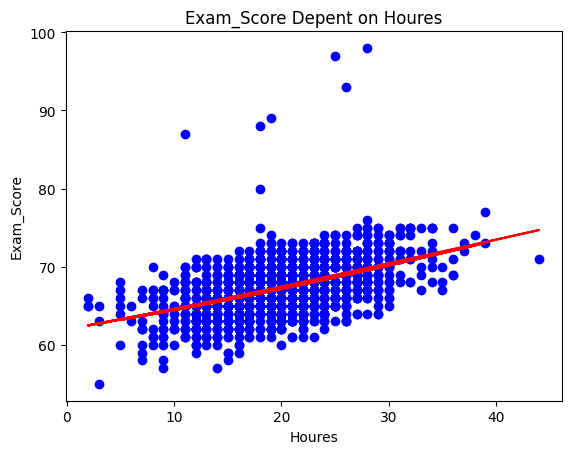

In [276]:

# Visualize the actual vs predicted exam scores
# Scatter plot shows actual data points (blue)
plt.scatter(X_test,y_test,color="blue",label="Actual Data")
# Line plot shows predicted values (red) from the linear regression model
plt.plot(X_test,y_pred,color="red")
# Add title and axis labels
plt.title("Exam_Score Depent on Houres")
plt.xlabel("Houres")
plt.ylabel("Exam_Score")


In [277]:
# Evaluate Linear Regression Model Performance

# Calculate R² score (coefficient of determination)
r2 = r2_score(y_test, y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
# Display evaluation metrics

print("R² Score:", r2)
print("mean_absolute_error:", mae)
print("mean_squared_error:", mse)

R² Score: 0.23284198821155744
mean_absolute_error: 2.44451162121857
mean_squared_error: 10.843834094915008
